In [2]:
# Importing all the libraries required

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

In [3]:
#Importing the dataset
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

bos.columns = boston.feature_names

In [4]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
#There's no price column in the dataframe. So adding it to the bos
bos['PRICE'] = boston.target

In [6]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
#Assigning the Dependant and independant variables
#Y = Price
#X = All the other attributes

X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

In [8]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [9]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [10]:
#Splitting Train and test datasets

from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 0)

C:\Users\Zakir\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
#Creating linear regression model
from sklearn.linear_model import LinearRegression

linearmodel = LinearRegression()
linearmodel.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
#Prediction
Y_pred = linearmodel.predict(X_test)
Y_pred

array([25.05723954, 24.05970464, 29.26948567, 12.08008654, 21.18910679,
       19.15481043, 20.75645997, 21.1357019 , 19.33331951, 20.43736207,
        5.74247784, 16.91358809, 17.04690781,  5.35757611, 40.28155608,
       32.47297998, 22.58395424, 36.70550432, 31.30307521, 23.28027912,
       24.70768647, 24.60652801, 20.57632979, 30.66163745, 22.35211431,
       10.94647988, 17.19763797, 18.27238756, 35.4952486 , 20.68111807,
       18.21374126, 17.70506227, 19.05340692, 23.54337543, 29.11696827,
       19.55613467, 10.87071119, 25.23361168, 18.14988338, 15.36647627,
       26.219471  , 20.68230234, 22.19934882, 15.57280169, 22.49057058,
       24.73804557, 19.45267657, 22.96379215,  9.51744327, 24.26508158,
       21.53366403, 17.55033369, 24.4618293 , 29.48665353, 13.3285441 ,
       21.41911232, 20.49930252, 14.68762709, 15.02308948, 21.84030704,
       16.94955503, 21.40634496, 33.13758498, 31.68204286, 17.94613422,
       33.16534256, 18.54065207, 18.68385778, 19.3423729 , 23.11

In [13]:
score = linearmodel.score(X,Y)
score

0.7375374166044959

Text(0.5,1,'Actual Prices vs Predicted prices')

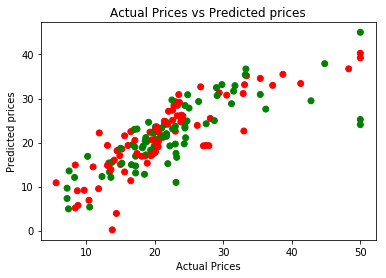

In [14]:
#Plotting the scatter plots
plt.scatter(Y_test, Y_pred, color = ['red', 'green'])
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices vs Predicted prices")